In [21]:
import numpy as np

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('data/train.csv')

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
X = df.drop(['Survived', 'PassengerId'], axis = 1)
acontinious_features =  X.select_dtypes(include=['float64', 'int64']).columns.tolist()
descrete_features = X.select_dtypes(include=['object']).columns.tolist()

In [73]:
continious_features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [74]:
descrete_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

### Grouping features on the basis of target

In [75]:
survived = df[df['Survived'] == 1]
died = df[df['Survived'] == 0]

In [83]:
survived.shape

(342, 12)

In [87]:
survived[survived['Age'].isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q


In [93]:
survived["Age"] = survived["Age"].fillna(survived["Age"].mean())
died["Age"] = died["Age"].fillna(died["Age"].mean())

<ipython-input-93-29bfc2f0de0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived["Age"] = survived["Age"].fillna(survived["Age"].mean())
<ipython-input-93-29bfc2f0de0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  died["Age"] = died["Age"].fillna(died["Age"].mean())


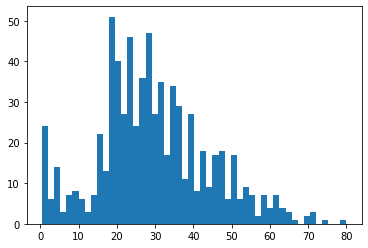

In [97]:
plt.hist(df['Age'], bins = 50)
plt.show()

In [100]:
stat, p_val = stats.shapiro(died['Age'].values)
p_val

2.2315404190308141e-13

In [103]:
t_stat, p_val = stats.ttest_ind(survived['Age'].values, died["Age"].values)

In [104]:
p_val

0.010798379035665778

### Z test

In [ ]:
survived_mean = survived_ages.mean()
died_mean = died_ages.mean()
survived_std = survived_ages.std()
died_std = died_ages.std()

# Compute the test statistic and p-value
z = (survived_mean - died_mean) / np.sqrt((survived_std ** 2 / len(survived_ages)) + (died_std ** 2 / len(died_ages)))
p = 2 * (1 - norm.cdf(abs(z)))


### Chi2 test

In [ ]:
import pandas as pd
import scipy.stats as stats

# create a contingency table of counts for variables A and B
data = {'A': ['Yes', 'Yes', 'No', 'No'], 'B': ['Yes', 'No', 'Yes', 'No']}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['A'], df['B'])

# perform the chi-square test
chi2_stat, p_val, dof, expected_freq = stats.chi2_contingency(contingency_table)

# print the results
print("Chi-square statistic: ", chi2_stat)
print("Degrees of freedom: ", dof)
print("p-value: ", p_val)
print("Expected frequencies: ")
print(expected_freq)


### ANOVA

In [ ]:
import pandas as pd
import scipy.stats as stats

# load data from CSV file
data = pd.read_csv('data.csv')

# extract the dependent variable y and the categorical independent variable x
y = data['y']
x = data['x']

# perform the ANOVA test
f_stat, p_val = stats.f_oneway(y[x=='A'], y[x=='B'], y[x=='C'])

# print the results
print("F-statistic: ", f_stat)
print("p-value: ", p_val)


### Pearson

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# create a dataframe with two features
data = {'Feature1': [1, 2, 3, 4, 5],
        'Feature2': [2, 4, 6, 8, 10]}
df = pd.DataFrame(data)

# compute the correlation coefficient and p-value
corr, p_val = pearsonr(df['Feature1'], df['Feature2'])

# print the correlation coefficient and p-value
print("Correlation coefficient:", corr)
print("p-value:", p_val)


### F Test

In [ ]:
import numpy as np
from scipy.stats import f_oneway

# Generate some sample data
group1 = np.array([1, 2, 3, 4, 5])
group2 = np.array([2, 4, 6, 8, 10])
group3 = np.array([3, 6, 9, 12, 15])

# Apply the F-test
f_stat, p_val = f_oneway(group1, group2, group3)

# Print the F-statistic and p-value
print("F-statistic:", f_stat)
print("p-value:", p_val)
